In [57]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from will import detect
import pandas as pd

In [58]:
# Load and prepare your data
data_dir_scattered = "simulated_scattered_bursts"
data_dir_simple = "simulated_simple_bursts"

# Load the data from both directories into separate arrays
data_scattered = []
data_simple = []

for filename in os.listdir(data_dir_scattered):
    if filename.endswith(".npy"):
        data_scattered.append(np.load(os.path.join(data_dir_scattered, filename)))

for filename in os.listdir(data_dir_simple):
    if filename.endswith(".npy"):
        data_simple.append(np.load(os.path.join(data_dir_simple, filename)))

data_scattered = np.array(data_scattered).reshape(-1, 1024 * 512)
data_simple = np.array(data_simple).reshape(-1, 1024 * 512)

In [59]:
print(data_scattered.shape)

(1000, 524288)


In [60]:
# Combine the two datasets into one
combined_data = np.concatenate((data_scattered, data_simple), axis=0)

# Reshape the combined data for PCA
combined_data_2d = combined_data.reshape(-1, 1024 * 512)

combined_data_2d.shape

(2000, 524288)

In [61]:
# Apply PCA to the combined data
n_components = 2  # You can adjust the number of components as needed
pca = PCA(n_components=n_components)
fit = pca.fit(combined_data_2d)
transformed_fit = pca.fit_transform(combined_data_2d)



In [62]:
pca1 = pca.transform(data_scattered)
pca2 = pca.transform(data_simple)

In [64]:
# Load the scattering times from the CSV files
data_info_simple = pd.read_csv("simulated_simple_bursts/simulated_simple_bursts.csv")
scattering_times_simple = data_info_simple['tau'].to_numpy()

data_info_scattered = pd.read_csv("simulated_scattered_bursts/simulated_scattered_bursts.csv")
scattering_times_scattered = data_info_scattered['tau'].to_numpy()

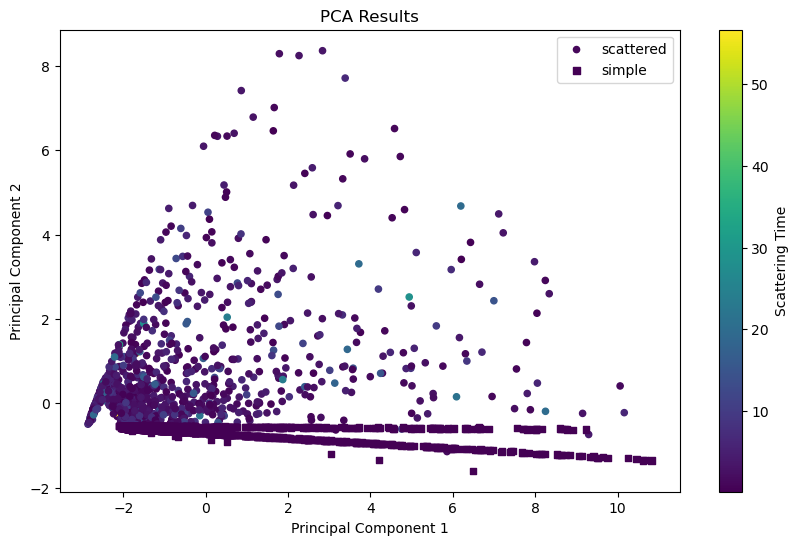

In [72]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a scatter plot where points are colored by scattering times
scatter =plt.scatter(pca1[:, 0], pca1[:, 1], c=scattering_times_scattered, cmap='viridis', label='scattered', marker='o', s=20)
plt.scatter(pca2[:, 0], pca2[:, 1], c=scattering_times_simple, cmap='viridis', label='simple', marker='s', s=20)

# Set axis labels
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Set a title for the plot
plt.title('PCA Results')

# Add a color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Scattering Time')

# Display a legend to differentiate the two datasets
plt.legend()

# Show the plot
plt.show()


In [51]:
# Apply PCA to the combined data
n_components = 3  # You can adjust the number of components as needed
pca = PCA(n_components=n_components)
fit = pca.fit(combined_data_2d)
transformed_fit = pca.fit_transform(combined_data_2d)

pca1 = pca.transform(data_scattered)
pca2 = pca.transform(data_simple)

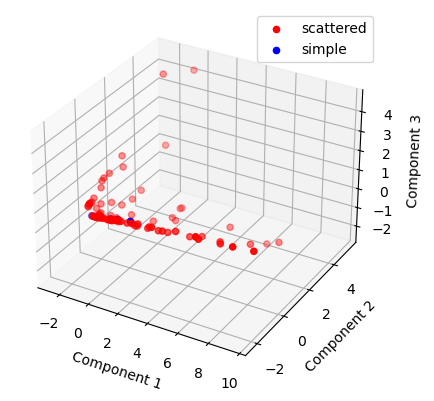

In [52]:
# PCA results pca1 and pca2 with three components each
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for pca1
ax.scatter(pca1[:, 0], pca1[:, 1], pca1[:, 2], c='r', label='scattered')

# Scatter plot for pca2
ax.scatter(pca2[:, 0], pca2[:, 1], pca2[:, 2], c='b', label='simple')

ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')

plt.legend()
plt.show()